.

# Project: Exploratory Data Analysis - Marketing 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



This data set was provided to students for their final project in order to test their statistical analysis skills as part of a MSc. in Business Analytics.

###### 1-Store visit or web visit, which brings more customers?
###### 2-Which age group purchased the most?
###### 3-Which campaign performed best and which one worst?
###### 4-Which product was sold the most in all campagins?
###### 5-Who purchased the most ?


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### Assesing

In [6]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
df.shape[0] #number of samples 

2240

In [8]:
df.shape[1] #number of columns

28

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

###### check about missing values

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

###### there is 24 missing values in Income column and i notice there is a space before it,let's remove this space,let's visual this Income to see if data symetrical or not, to fill this data with mean or median

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


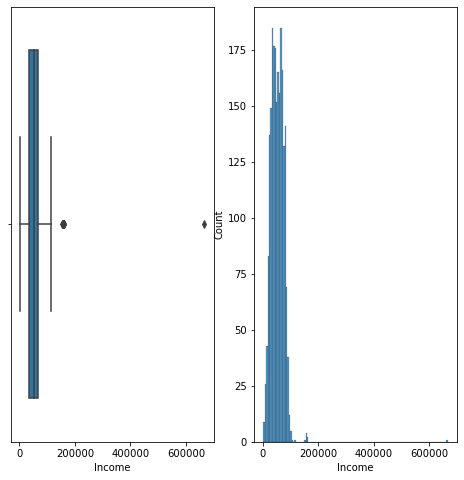

In [31]:
#df.Income.plot(kind = 'hist' , figsize=(8,8));
plt.figure(figsize = (8,8));
plt.subplot(1,2,1);
sns.boxplot(df.Income);
plt.subplot(1,2,2);
sns.histplot(df.Income);

 the data is not symetrical, so i will use the median to fill this missing values 

In [33]:
df.Income.fillna(value = df.Income.median() , inplace = True)

In [36]:
df.isnull().sum().any() # the missing values are gone

False

In [11]:
df.rename(columns = {' Income ':'Income'} , inplace = True)

In [12]:
df.Income.head()

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name: Income, dtype: object

In [14]:
df.Income.dtypes # i will convert it into float from string

dtype('O')

In [ ]:
df.Income = df.Income.str.replace('$',"").str.replace(",","") 
df.Income = df.Income.astype(float)
df.Income.dtypes

###### Check duplicates

In [27]:
sum(df.duplicated())

0

###### let's convert this dataframe into sub dataframe

In [52]:
df_cat = df.loc[: , df.dtypes == np.object]
df_cat.head()
df_cat.shape[1]

<ipython-input-52-f7d03e1dab1c>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df.loc[: , df.dtypes == np.object]


4

In [55]:
cat_num = ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']
df_cat_num = df[cat_num]
df_cat_num.head(2)

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,1,0


In [56]:
num = ['Year_Birth','Income','Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_num = df[num]

###### Analysis Numerical Continuous variable

In [57]:
df_num.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,25037.955891,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [58]:
df_num = df_num.drop(['Dt_Customer'],axis=1)

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


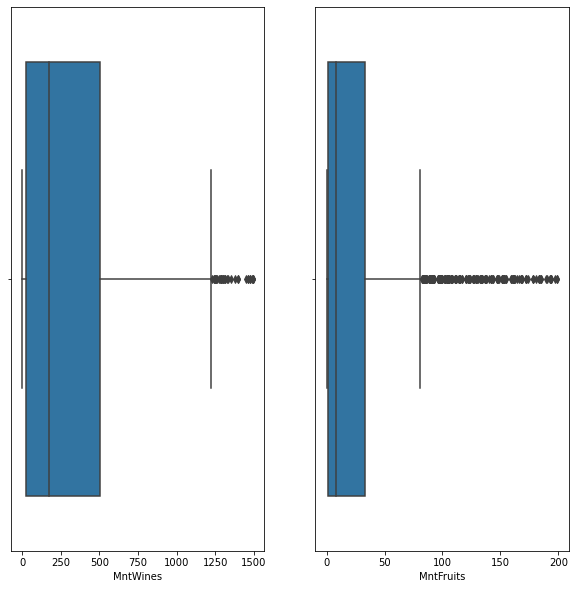

In [78]:
#df_num['MntWines'].plot(kind='hist');
plt.figure(figsize = (10,10));
plt.subplot(1,2,1)
sns.boxplot(df_num['MntWines']);
plt.subplot(1,2,2)
sns.boxplot(df_num['MntFruits']);



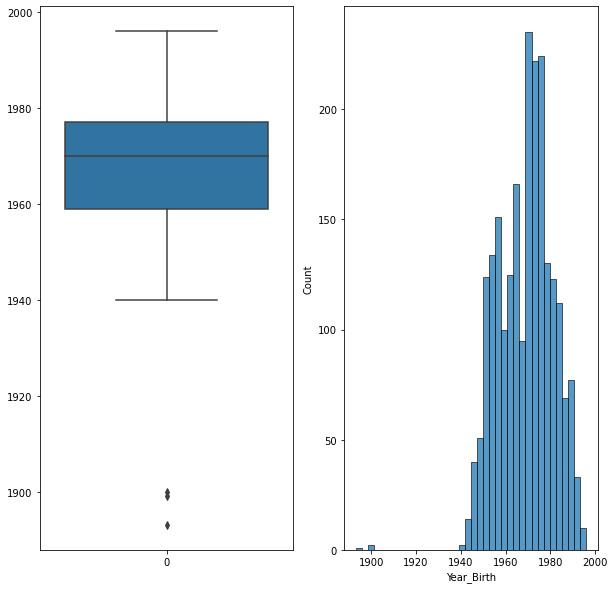

In [82]:
plt.figure(figsize = (10,10));
plt.subplot(1,2,1)
sns.boxplot(data = df_num['Year_Birth']);
plt.subplot(1,2,2)
sns.histplot(df_num['Year_Birth']);


### We need to remove it as it's not possible for a customer to have birth year less than 1900

In [84]:
Q1 = df_num['Year_Birth'].quantile(0.25)
Q3 = df_num['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
print(Q1 )
print(Q3 )
print(IQR )

1959.0
1977.0
18.0


In [85]:
df_num = df_num[~((df_num['Year_Birth'] < (Q1 - 1.5 * IQR)) |(df_num['Year_Birth'] > (Q3 + 1.5 * IQR)))]

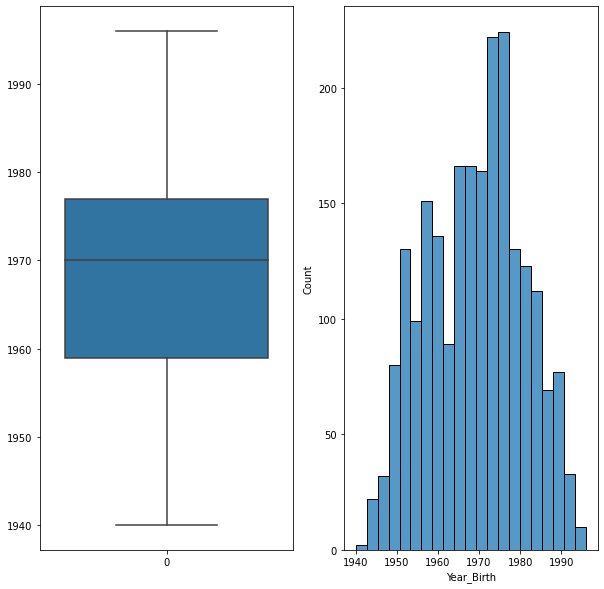

In [89]:
plt.figure(figsize = (10,10));
plt.subplot(1,2,1)
sns.boxplot(data = df_num['Year_Birth']);
plt.subplot(1,2,2)
sns.histplot(df_num['Year_Birth']);

###### Correlation

<AxesSubplot:>

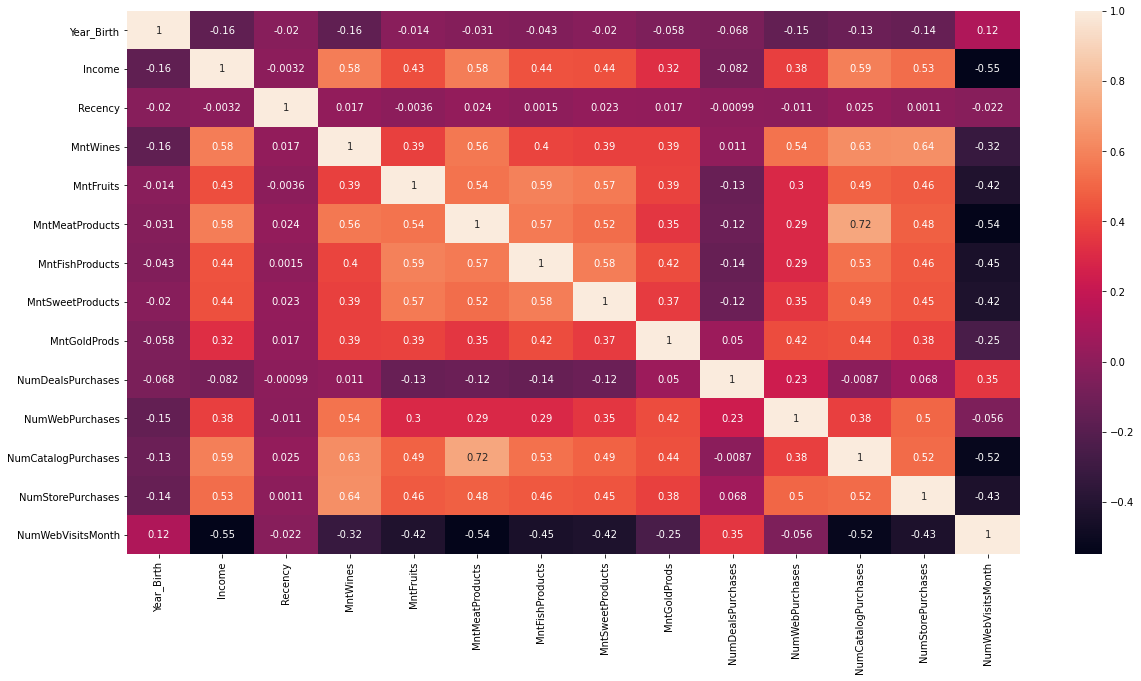

In [90]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True) #heatmap function uses with number values 

##### Analysis of each categorical column

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


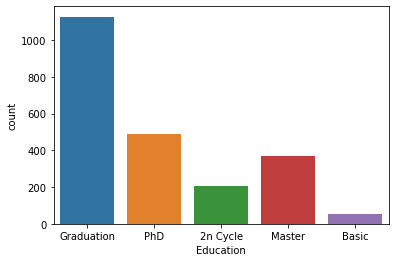

In [93]:
sns.countplot(df["Education"]);



Insight: So we have maximum customers who have completed their Graduation, and only a few of them have gone to study further after Graduation

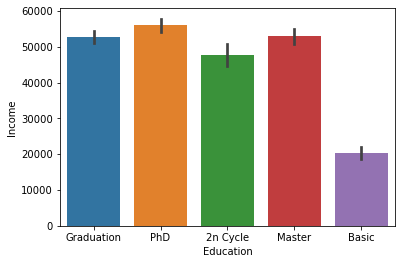

In [95]:
sns.barplot(x=df["Education"],y=df["Income"]);

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


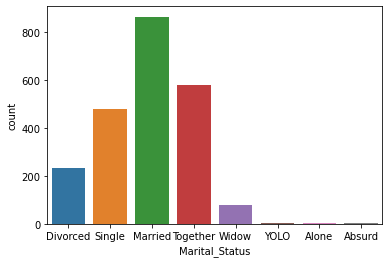

In [96]:
sns.countplot(df["Marital_Status"]);

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


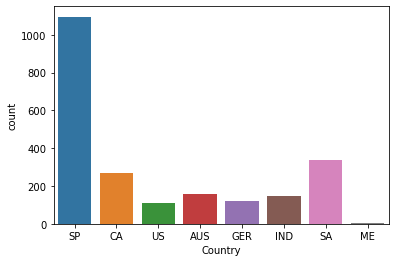

In [98]:
sns.countplot(df["Country"]);

Spain has maximum customers.

In [99]:
Products = [col for col in df.columns if 'Mnt' in col]
Products_total = []
for i in range(0,6):# we have 6 products
  print("{} = ${}".format(Products[i],df[Products[i]].sum(axis=0)))
  Products_total.append(df[Products[i]].sum(axis=0))

MntWines = $680816
MntFruits = $58917
MntMeatProducts = $373968
MntFishProducts = $84057
MntSweetProducts = $60621
MntGoldProds = $98609


<AxesSubplot:>

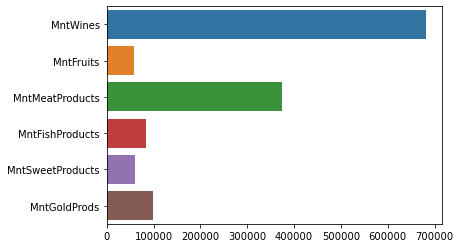

In [100]:
sns.barplot(x=Products_total, y=Products)

In [101]:
Purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
Purchases_total = []
for i in range(0,4):
  print("{} = {}".format(Purchases[i],df[Purchases[i]].sum(axis=0)))
  Purchases_total.append(df[Purchases[i]].sum(axis=0))

NumDealsPurchases = 5208
NumWebPurchases = 9150
NumCatalogPurchases = 5963
NumStorePurchases = 12970


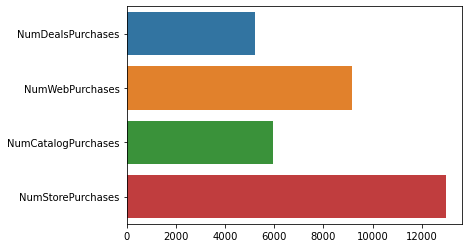

In [103]:
sns.barplot(x = Purchases_total,y = Purchases);

##### Categorical Numerical

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


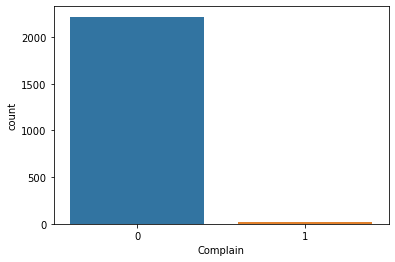

In [106]:
sns.countplot(df["Complain"]);

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


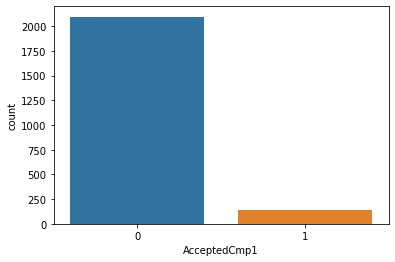

In [108]:
sns.countplot(df["AcceptedCmp1"]);

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


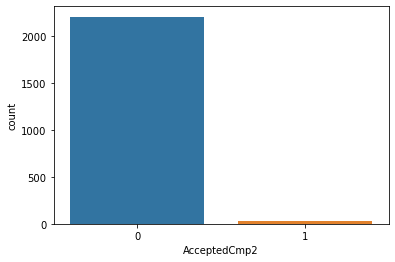

In [109]:
sns.countplot(df["AcceptedCmp2"]);

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


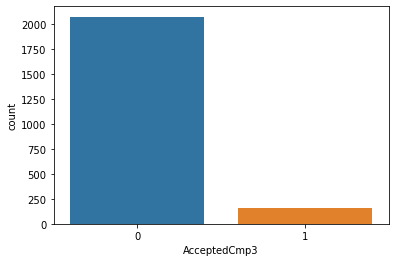

In [110]:
sns.countplot(df["AcceptedCmp3"]);

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


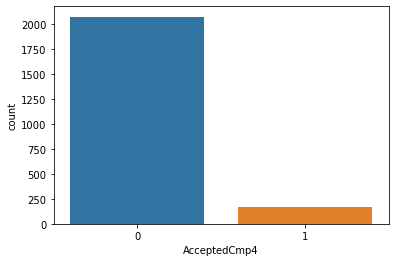

In [111]:
sns.countplot(df["AcceptedCmp4"]);

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


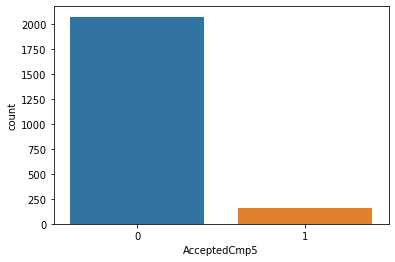

In [112]:
sns.countplot(df["AcceptedCmp5"]);

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


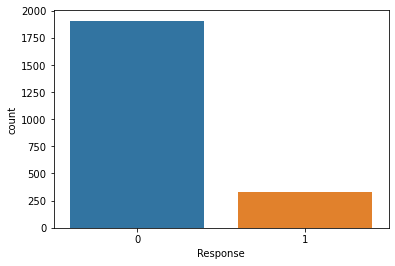

In [113]:
sns.countplot(df["Response"]);

In [114]:
df2 = df.copy()
df2["AmountSpent"] = df[Products].sum(axis=1)
df2["PurchasesMade"] = df[Purchases].sum(axis=1)

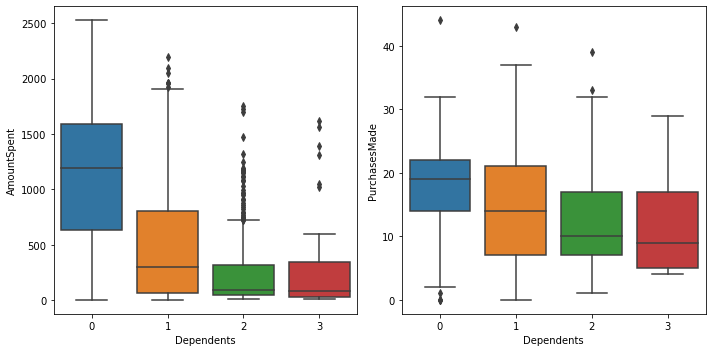

In [115]:
df2["Dependents"] = df2["Kidhome"] + df2["Teenhome"]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2["AmountSpent"],x=df2["Dependents"])
plt.subplot(1,2,2)
sns.boxplot(y=df2["PurchasesMade"],x=df2["Dependents"])
plt.tight_layout()

In [116]:
df2["Age"] = pd.datetime.today().year - df["Year_Birth"]

<ipython-input-116-8bea0c305294>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df2["Age"] = pd.datetime.today().year - df["Year_Birth"]


In [118]:
df2["Age_category"] = df2['Age'].apply(lambda x: 'Senior Citizen' if x >= 60 else 'Adult' if x > 25 else 'Youth')

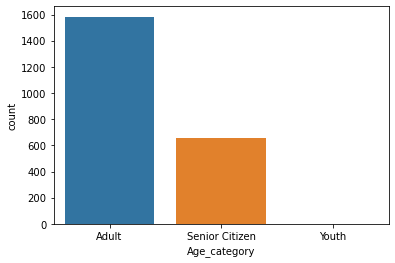

In [120]:
sns.countplot(x=df2["Age_category"]);

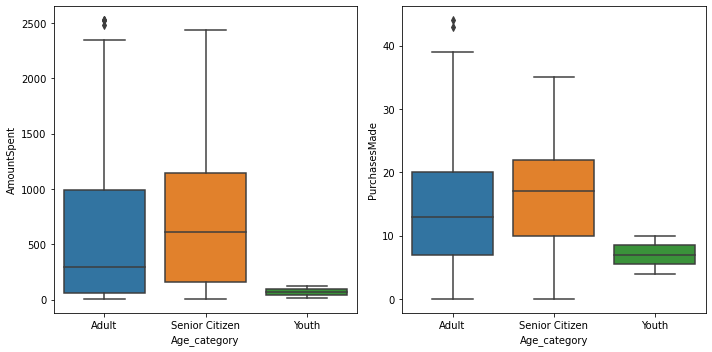

In [121]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2["AmountSpent"],x=df2["Age_category"])
plt.subplot(1,2,2)
sns.boxplot(y=df2["PurchasesMade"],x=df2["Age_category"])
plt.tight_layout()

Surprisingly, Senior citizens are making more puchases and spending more as compared to Adults.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What factors are significantly related to the number of store purchases?)

In [122]:
df_num.corrwith(df_num.NumStorePurchases).sort_values()

NumWebVisitsMonth     -0.429886
Year_Birth            -0.139465
Recency                0.001117
NumDealsPurchases      0.068062
MntGoldProds           0.383264
MntSweetProducts       0.448801
MntFishProducts        0.460099
MntFruits              0.463168
MntMeatProducts        0.480110
NumWebPurchases        0.502277
NumCatalogPurchases    0.518884
Income                 0.527346
MntWines               0.642433
NumStorePurchases      1.000000
dtype: float64

As we can see number of store purchases are highly correlated to amount of wines purchased. So we can conclude that may be wines are purchased more of the time from store

Insight: NumStorePurchases decrease with the increase in NumWebVisitsMonth. Also, NumStorePurchases increases with the mAmount spent on wines and NumCatalogPurchases.


<a id='conclusions'></a>
## Conclusions

Store visit or web visit, which brings more customers? : Store Visit¶


Which campaign performed best and which one worst? : cmp4 performed best and cmp2 least


Which age group purchased the most?: Senior citizen

Who purchased the most: people with no dependents

Which country has maximum customers? :Spain 

which product was sold the most in all campagins?: Wine
